In [73]:
import torch , numpy as np
import random
import matplotlib.pyplot as plt

In [74]:
#生成个数据集
def synthetic_data(w,b, num_examples):
    "生成y=wx+b+噪声"
    X = torch.normal(0,1,(num_examples, len(w)))
    y = torch.matmul(X, w)+b
    y +=torch.normal(0,0.01,y.shape)
    return X, y.reshape(-1, 1)

true_w = torch.tensor(([2, -3.4]))
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features.shape, labels.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

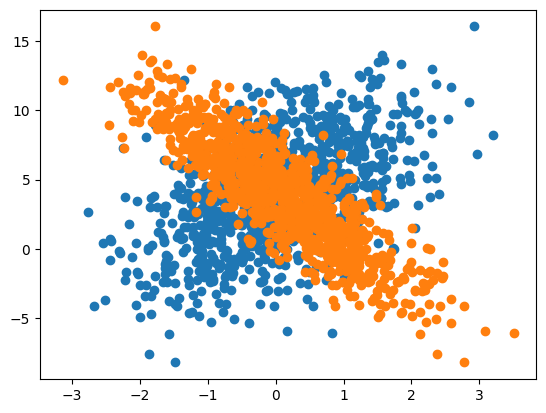

In [75]:
#查看 数据分布 , 特征一 w为正，与y正相关， 特征二负相关
for i in [0,1]:
    plt.scatter(features[:,i], labels)

In [76]:
#读取数据集

def data_iter(batch_size, features, labels):
    num_examples = len(features) #1000
    indices = list(range(num_examples))
    random.shuffle(indices)#打乱索引
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [77]:
batch_size= 10 #查看每个batch的数据
for X, y in data_iter(batch_size, features, labels):
    print(X,y)
    break

tensor([[ 1.1556, -0.5000],
        [-1.1396, -0.1858],
        [-0.5173, -0.1711],
        [-0.0318,  0.4652],
        [-0.1125, -1.0319],
        [-0.6451, -1.0210],
        [-0.1459, -0.3603],
        [ 1.5013,  1.9921],
        [-1.0466, -0.4888],
        [-0.9508,  2.2172]]) tensor([[ 8.2242],
        [ 2.5409],
        [ 3.7551],
        [ 2.5541],
        [ 7.4775],
        [ 6.3765],
        [ 5.1518],
        [ 0.4402],
        [ 3.7833],
        [-5.2597]])


In [78]:
#初始化模型参数

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1 ,requires_grad=True)
w,b

(tensor([[-0.0188],
         [-0.0049]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [79]:
#定义模型

In [80]:
#线性模型
def linreg(X, w, b):
    return torch.matmul(X,w)+b

In [81]:
#定义损失函数
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [82]:
#定义优化算法
def sgd(params, lr, batch_size):
    "小批量随机梯度下降"
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [83]:
#训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss


for epoach in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y)#每一批的损失 ， 形状为(batch_size, 1) 
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size) #更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch, {epoch+1} , loss{float(train_l.mean()):f}')
#         print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        

epoch, 3 , loss0.050689
epoch, 3 , loss0.000217
epoch, 3 , loss0.000051


In [84]:
w,b

(tensor([[ 1.9991],
         [-3.3998]], requires_grad=True),
 tensor([4.1987], requires_grad=True))